# Fig. 5.1 Network Traffic Class Distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from common import rename_attack
from common import rename_dataset

In [2]:
data_org = pd.read_csv("../data/netflow_statistics/dataset_statistics_org.csv")
data_org["Attack"] = data_org["Attack"].apply(rename_attack)
data_org["Dataset"] = data_org["Dataset"].apply(rename_dataset)
data_org.head()

,Attack,Dataset,Dataset.1
0,Analysis,UNSW-NB15,0.0000
1,Backdoor,TON-IoT,0.0002
2,Backdoor,UNSW-NB15,0.0000
3,Benign,BoT-IoT,0.0018
4,Benign,CSE-CIC-IDS2018,0.2189


In [3]:
data_org

,Attack,Dataset,Dataset.1
0,Analysis,UNSW-NB15,0.0000
1,Backdoor,TON-IoT,0.0002
2,Backdoor,UNSW-NB15,0.0000
3,Benign,BoT-IoT,0.0018
4,Benign,CSE-CIC-IDS2018,0.2189
5,Benign,TON-IoT,0.0803
6,Benign,UNSW-NB15,0.0302
7,Bot,CSE-CIC-IDS2018,0.0019
8,Password,CSE-CIC-IDS2018,0.0016
9,DDoS,BoT-IoT,0.2412


In [4]:
data_sample = pd.read_csv("../data/netflow_statistics/dataset_statistics_sample.csv")
data_sample["Attack"] = data_sample["Attack"].apply(rename_attack)
data_sample["Dataset"] = data_sample["Dataset"].apply(rename_dataset)
data_sample.head()

,Attack,Dataset,Dataset.1
0,Benign,BoT-IoT,0.0278
1,Benign,CSE-CIC-IDS2018,0.0276
2,Benign,TON-IoT,0.0276
3,Benign,UNSW-NB15,0.0281
4,Bot,CSE-CIC-IDS2018,0.1111


In [5]:
attacks = sorted(list(data_sample["Attack"].unique()), reverse=True)
datasets = list(data_sample["Dataset"].unique())
attacks, datasets

(['XSS',
  'Scanning',
  'Password',
  'Injection',
  'Infiltration',
  'DoS',
  'DDoS',
  'Bot',
  'Benign'],
 ['BoT-IoT', 'CSE-CIC-IDS2018', 'TON-IoT', 'UNSW-NB15'])

In [6]:
def convert(d):
    return np.array(list(d.values()))

In [7]:
org_statistics = {attack:{dataset:0 for dataset in datasets} for attack in attacks}

for row in data_org.iterrows():
    attack,dataset,percentage = list(row[1])
    if org_statistics.get(attack):
        org_statistics[attack][dataset] = percentage

y = [convert(org_statistics[attacks[i]]) for i, attack in enumerate(attacks, 0)]
yt = list(np.array(y).transpose())

In [8]:
data_org["Attack"].unique()

array(['Analysis', 'Backdoor', 'Benign', 'Bot', 'Password', 'DDoS', 'DoS',
       'Exploits', 'Fuzzers', 'Generic', 'Infiltration', 'Scanning',
       'Shellcode', 'Theft', 'Worms', 'Injection', 'mitm', 'ransomware',
       'XSS'], dtype=object)

In [9]:
sample_statistics = {attack:{dataset:0 for dataset in datasets} for attack in attacks}

for row in data_sample.iterrows():
    attack,dataset,percentage = list(row[1])
    if org_statistics.get(attack):
        sample_statistics[attack][dataset] = percentage

sample_statistics_red = {attack:sample_statistics[attack] for attack in attacks}
y_sample = [convert(sample_statistics_red[attacks[i]]) for i, attack in enumerate(attacks, 0)]
yt_sample = list(np.array(y_sample).transpose())

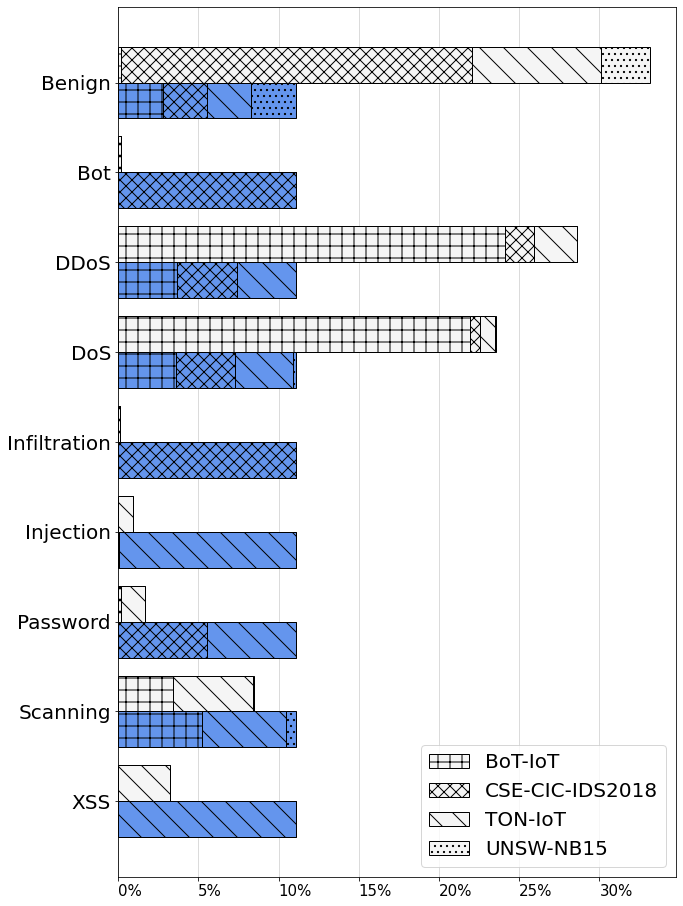

In [10]:
plt.figure(figsize=(10,16))
hatches = ["+", "xx", "\\", ".."]
Y_axis = np.arange(len(attacks))

for i, dataset in list(enumerate(datasets, 0)):
    plt.barh(Y_axis -0.2, yt_sample[i], 0.4, left=sum(yt_sample[:i]), color="cornflowerblue", hatch=hatches[i], edgecolor="black", zorder=3)
    plt.barh(Y_axis +0.2, yt[i], 0.4, left=sum(yt[:i]),label=dataset, color="whitesmoke", hatch=hatches[i], edgecolor="black", zorder=3)
plt.grid(color='lightgray', axis="x", zorder=0)
plt.yticks(Y_axis, attacks, fontsize=20)
plt.xticks(fontsize=15, ha="left")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.legend(fontsize=20)
plt.savefig(f'../img/class_distribution', bbox_inches='tight')

['XSS', 'Scanning', 'Password', 'Injection', 'Infiltration', 'DoS', 'DDoS', 'Bot', 'Benign']
0 BoT-IoT
1 CSE-CIC-IDS2018
2 TON-IoT
3 UNSW-NB15


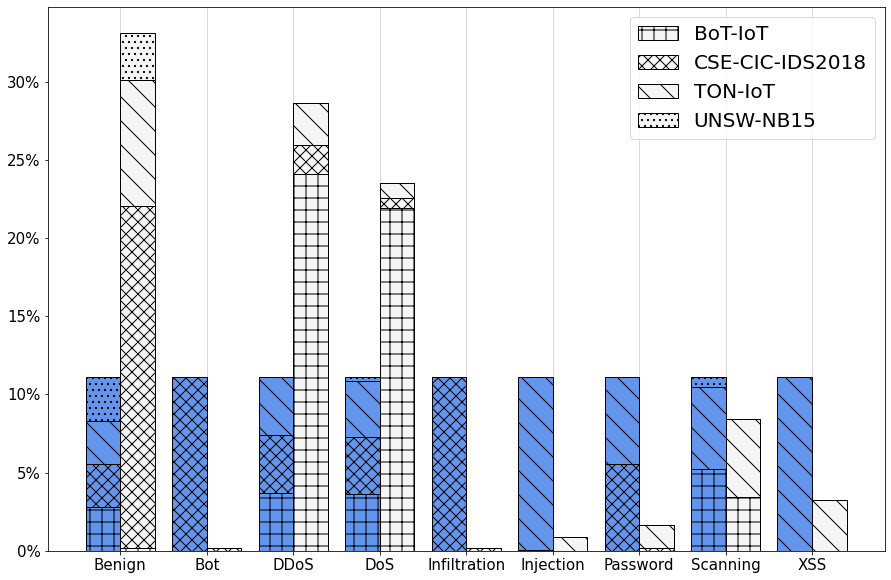

In [11]:
plt.figure(figsize=(15,10))
hatches = ["+", "xx", "\\", ".."]
X_axis = np.arange(len(attacks))
yt_sample_rev = np.flip(yt_sample, axis=1)
yt_rev = np.flip(yt, axis=1)
attacks_rev = sorted(attacks, reverse=True)
print(attacks)
for i, dataset in list(enumerate(datasets,0)):
    print(i, dataset)
    plt.bar(X_axis -0.2, yt_sample_rev[i], 0.4, bottom=sum(yt_sample_rev[:i]), color="cornflowerblue", hatch=hatches[i], edgecolor="black", zorder=3)
    plt.bar(X_axis +0.2, yt_rev[i], 0.4, bottom=sum(yt_rev[:i]), label=dataset, color="whitesmoke", hatch=hatches[i], edgecolor="black", zorder=3)
plt.grid(color='lightgray', axis="x", zorder=0)
plt.xticks(X_axis, sorted(attacks), fontsize=15)

plt.yticks(fontsize=15)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.legend(fontsize=20)